<a href="https://colab.research.google.com/github/BMSaumya/Inspiher/blob/main/final_task_nethmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 1.9294302387519287
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.80239906 12.63448893  2.85220468  8.20507322  8.48964286 12.91905857
 19.47994958  6.47627208  3.77565751 12.63448893 15.05053387  5.78902828
 14.12708104 10.90568779 14.64785971  8.20507322  6.87894624 10.90568779
 16.14045182  4.98367997 14.5297552  16.14045182 15.73777766  4.4629013
  4.06022714 20.16719338 10.90568779  9.41309569 17.46657881 10.218444
  7.68429455  8.0869687  15.73777766 12.63448893  6.47627208  4.06022714
 -1.05643237 15.05053387 12.63448893  6.87894624  5.26824961  9.69766533
 14.5297552   8.20507322 16.54312598  9.81576984 11.30836195 14.24518556
 11.82914062 16.94580013 13.43983725 15.05053387 10.50301364  8.20507322
  4.17833166 11.7

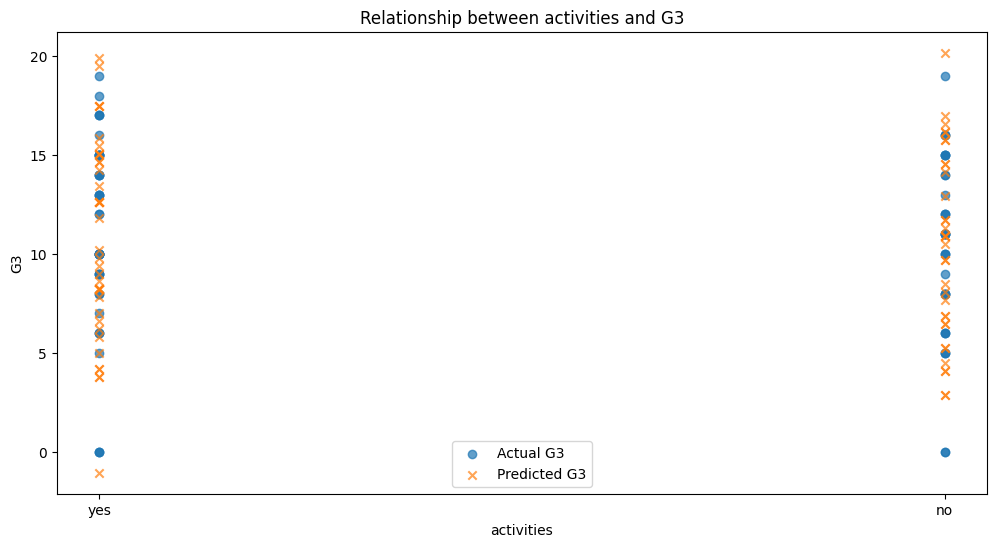

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['activities', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'activities'
data = pd.get_dummies(data, columns=['activities'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'activities_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'activities' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'activities': df.loc[X_test.index, 'activities'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'activities' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['activities'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['activities'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('activities')
plt.ylabel('G3')
plt.title('Relationship between activities and G3')
plt.legend()
plt.show()

Mean Squared Error: 1.9220601422947805
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.0448818  12.88012032  2.80670673  8.19287345  8.44781834 12.88012032
 19.73004156  6.43313563  4.01551636 12.88012032 15.29773958  6.03019908
 14.08892995 10.61049271 14.63985814  8.19287345  6.58112727 10.8654376
 15.84866777  4.9693811  14.49186649 15.84866777 15.44573123  4.16350801
  4.01551636 19.87803321 10.61049271  9.40168308 17.71535884 10.20755617
  7.64194526  7.78993691 15.70067613 12.88012032  6.43313563  3.76057147
 -0.81972216 15.29773958 12.62517543  6.83607217  5.224326    9.65662797
 14.49186649  8.44781834 16.25160432 10.05956452 11.26837415 14.49186649
 12.07424723 16.65454086 13.68599341 15.29773958 10.46250106  8.19287345
  4.41845291 11

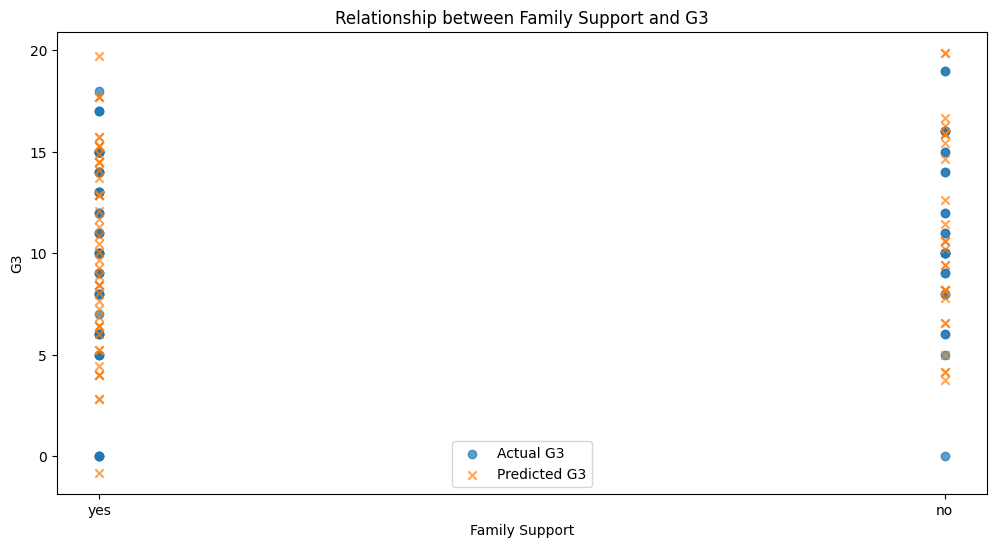

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['famsup', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'famsup'
data = pd.get_dummies(data, columns=['famsup'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'famsup_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'famsup' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'Family Support': df.loc[X_test.index, 'famsup'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'famsup' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Family Support'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Family Support'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Family Support')
plt.ylabel('G3')
plt.title('Relationship between Family Support and G3')
plt.legend()
plt.show()


Mean Squared Error: 1.4738223109353894
[8, 14, 3, 8, 9, 12, 19, 9, 8, 11, 14, 7, 12, 11, 15, 11, 8, 11, 16, 10, 14, 14, 14, 5, 7, 18, 11, 8, 16, 11, 8, 8, 15, 12, 7, 6, 4, 14, 12, 6, 8, 8, 14, 9, 17, 11, 11, 15, 10, 17, 14, 14, 9, 8, 6, 10, 12, 6, 15, 17, 11, 8, 9, 6, 7, 16, 7, 10, 9, 15, 8, 9, 15, 18, 12, 7, 9, 15, 6]
[ 9.13276398 12.3201204   5.92436309  9.64294558  9.64294558 12.56468897
 17.08011057  8.31488041  6.72120219 12.56468897 14.15836718  8.04926737
 13.36152807 11.23662379 13.89275414  9.64294558  8.58049344 11.23662379
 14.68959325  7.5180413  13.62714111 14.68959325 14.42398021  6.98681523
  6.72120219 17.3457236  11.23662379 10.43978469 15.75204539 10.97101076
  9.11171951  9.37733255 14.42398021 12.56468897  8.31488041  6.72120219
  3.53384577 14.15836718 12.56468897  8.58049344  7.5180413  10.43978469
 13.62714111  9.64294558 14.95520628 10.70539772 11.50223683 13.62714111
 12.0334629  15.22081932 13.09591504 14.15836718 10.97101076  9.64294558
  6.98681523 11.767849

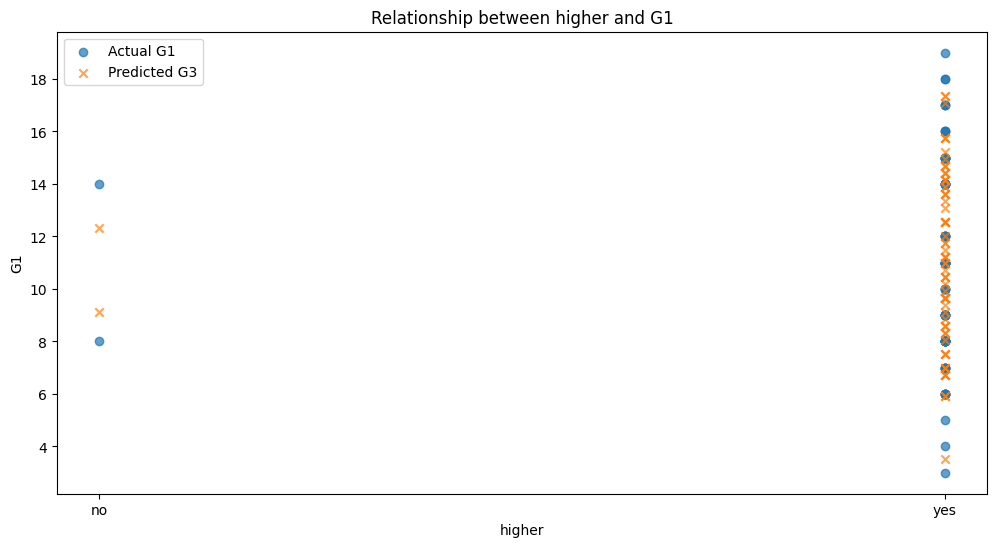

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['higher', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'higher'
data = pd.get_dummies(data, columns=['higher'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'higher_yes']]
y = data['G1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'higher' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'higher': df.loc[X_test.index, 'higher'], 'Mean G': X_test['mean_G'], 'Actual G1': y_test.values, 'Predicted G1': y_pred})

# Plot the relationship between 'higher' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['higher'], plot_data['Actual G1'], label='Actual G1', alpha=0.7)
plt.scatter(plot_data['higher'], plot_data['Predicted G1'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('higher')
plt.ylabel('G1')
plt.title('Relationship between higher and G1')
plt.legend()
plt.show()


Mean Squared Error: 1.8988629542438338
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.94200597 12.77095331  2.71064636  8.34441825  8.37618249 12.77095331
 19.61196204  6.33235686  3.91788319 12.80271756 15.18542698  5.92994458
 13.97819015 10.75889192 14.7830147   8.37618249  6.73476914 10.79065616
 15.99025154  5.15688427 14.38060243 15.99025154 15.58783926  4.35205971
  3.91788319 20.01437432 10.75889192  9.55165509 17.59990065 10.35647964
  7.5395937   7.94200597 15.58783926 12.77095331  6.33235686  3.94964743
 -0.91106415 15.21719123 12.80271756  6.73476914  5.12512003  9.55165509
 14.38060243  8.34441825 16.42442806  9.95406737 11.1613042  14.38060243
 11.96612876 16.7950761  13.60754211 15.18542698 10.35647964  8.34441825
  4.32029547 1

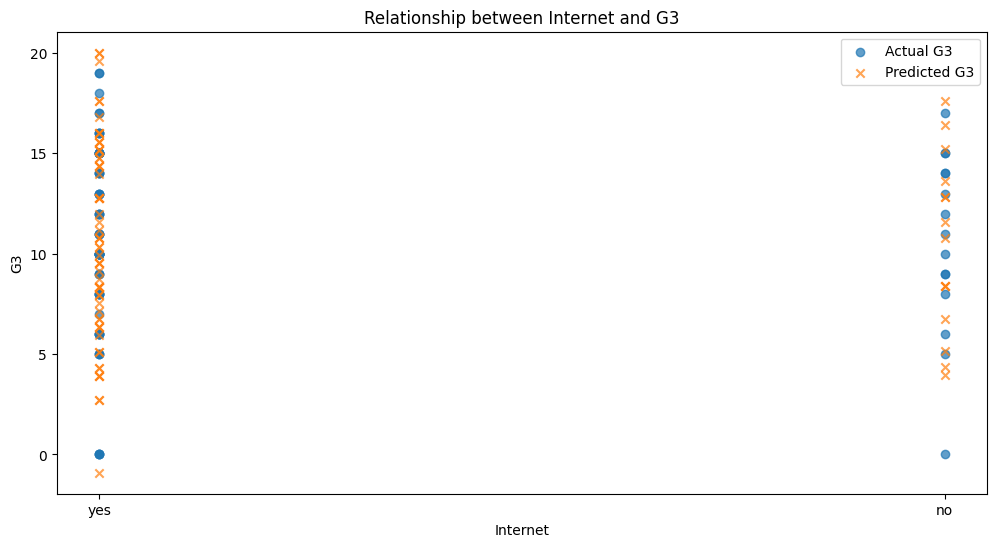

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['internet', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'internet'
data = pd.get_dummies(data, columns=['internet'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'internet_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'internet' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'Internet': df.loc[X_test.index, 'internet'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'internet' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Internet'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Internet'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Internet')
plt.ylabel('G3')
plt.title('Relationship between Internet and G3')
plt.legend()
plt.show()


Mean Squared Error: 1.890277089776857
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.9297126  12.75881039  2.69818999  8.33213741  8.33213741 12.75881039
 19.60003225  6.32001334  3.90546444 12.75881039 15.17335928  5.91758852
 14.05308901 10.83369048 14.77093447  8.33213741  6.72243815 10.83369048
 15.97820891  5.11273889 14.36850965 16.06521309 15.5757841   4.30788926
  3.90546444 20.00245707 10.74668631  9.62641604 17.58790818 10.34426149
  7.52728778  7.9297126  15.5757841  12.75881039  6.32001334  3.90546444
 -0.83662917 15.17335928 12.75881039  6.80944233  5.19974306  9.53941186
 14.45551383  8.33213741 16.4676379   9.94183668 11.14911112 14.36850965
 11.95396076 16.78305854 13.56366002 15.17335928 10.43126567  8.33213741
  4.30788926 11

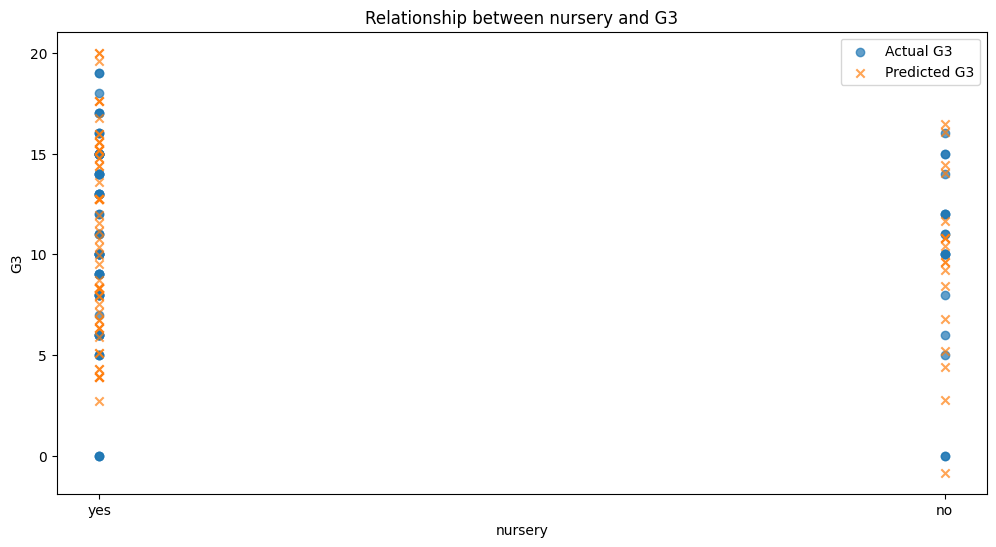

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['nursery', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'nursery'
data = pd.get_dummies(data, columns=['nursery'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'nursery_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'nursery' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'nursery': df.loc[X_test.index, 'nursery'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'nursery' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['nursery'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['nursery'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('nursery')
plt.ylabel('G3')
plt.title('Relationship between nursery and G3')
plt.legend()
plt.show()


Mean Squared Error: 1.8912820421376002
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.8823822  12.85350005  2.66662606  8.44016793  8.44016793 12.85350005
 19.51753051  6.43410787  4.02683581 12.69692633 15.26077211  6.03289586
 13.90056236 10.69086627 14.70298638  8.44016793  6.83531988 10.84743999
 15.90662242  5.07389812 14.30177437 15.90662242 15.66198412  4.2714741
  3.87026209 19.91874253 10.84743999  9.48723024 17.51147046 10.28965426
  7.63774391  7.8823822  15.66198412 12.85350005  6.43410787  4.02683581
 -0.94428204 15.10419839 12.69692633  6.83531988  5.07389812  9.64380396
 14.45834809  8.28359421 16.30783443 10.04501597 11.09207828 14.30177437
 12.05107603 16.70904644 13.65592407 15.26077211 10.44622798  8.44016793
  4.42804782 11

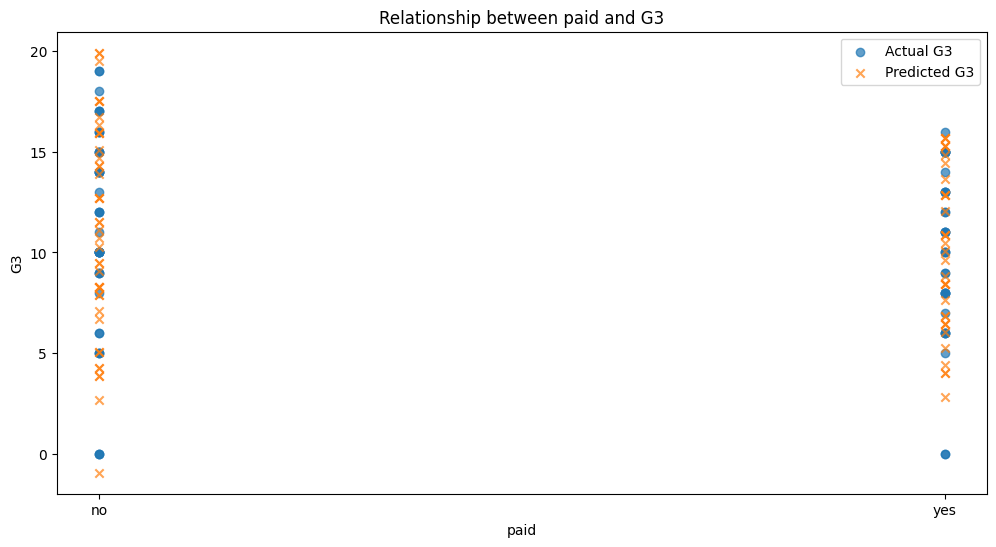

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['paid', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'paid'
data = pd.get_dummies(data, columns=['paid'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'paid_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'paid' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'paid': df.loc[X_test.index, 'paid'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'paid' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['paid'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['paid'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('paid')
plt.ylabel('G3')
plt.title('Relationship between paid and G3')
plt.legend()
plt.show()


Mean Squared Error: 2.0218404723646195
[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.11909735 12.45829699  2.44077575  8.05058764  8.5197982  12.92750755
 19.739422    6.51629395  4.11208885 12.92750755 15.33171265  5.64638254
 14.1296101  10.9240033  14.9310118   8.5197982   6.44778424 10.9240033
 16.13311435  5.3141914  14.53031095 16.13311435 15.26320294  4.5127897
  4.11208885 20.14012285 10.45479274  9.72190075 17.26670719 10.52330245
  7.24918594  8.11909735 15.7324135  12.92750755  6.04708339  4.11208885
 -1.1655319  15.33171265 12.92750755  6.9169948   4.84498084  9.72190075
 14.06110039  8.5197982  16.5338152  10.1226016  11.32470415 14.06110039
 11.65689529 16.93451605 13.72890925 15.33171265 10.52330245  8.5197982
  4.04357915 11.2

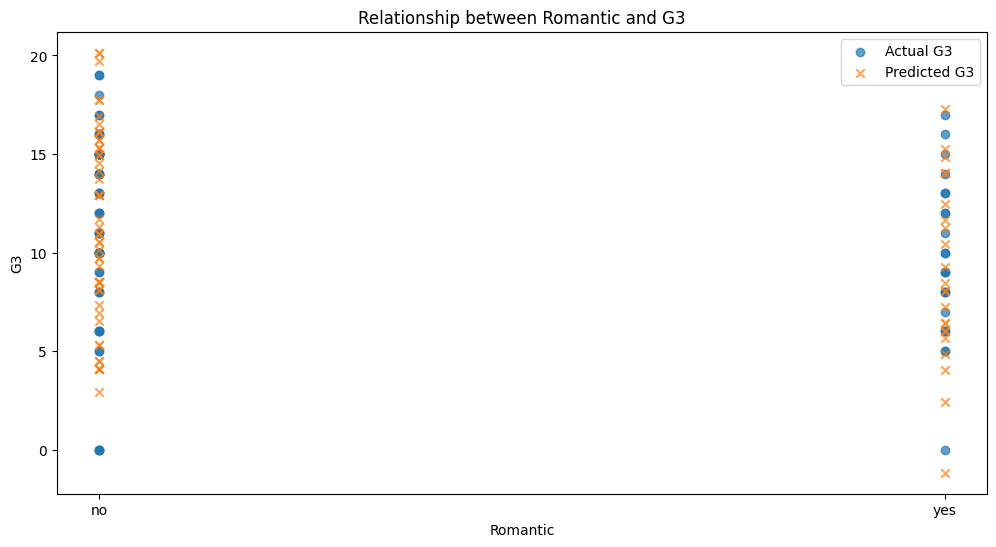

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['romantic', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'romantic'
data = pd.get_dummies(data, columns=['romantic'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'romantic_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'romantic' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'Romantic': df.loc[X_test.index, 'romantic'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'romantic' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Romantic'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Romantic'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Romantic')
plt.ylabel('G3')
plt.title('Relationship between Romantic and G3')
plt.legend()
plt.show()
